In [1]:
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd


df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True) # Accuracy by including id is 0.6071428571428571, 60% 
                                 # whereas it is 0.9785714285714285, 97% by droping it

X = np.array(df.drop( ['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size= 0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

predict_for = np.array([ [4,2,3,1,2,2,5,3,2], [4,2,3,4,10,4,5,10,8] ])
predict_for = predict_for.reshape(len(predict_for),-1)
prediction = clf.predict(predict_for)

print(accuracy, prediction)

E:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.9428571428571428 [2 4]


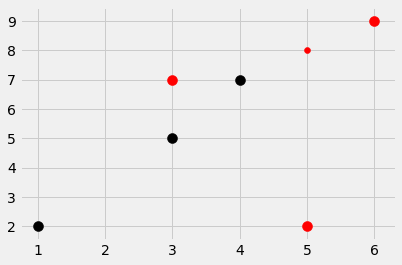

In [3]:
# Applying our implemented KNN on Cancer Dataset 

import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import style 
from collections import Counter
style.use('fivethirtyeight')

dataset = {'k':[[1,2],[3,5],[4,7]], 'r':[[5,2],[6,9],[3,7]]}
predict_for = [5,8]

def k_nearest_neighbors(data, predict, k=3):
    if len(data) > k:
        warnings.warn('K is said to a value less than voting groups')
    
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    voted_result = Counter(votes).most_common(1)[0][0]
    
    return voted_result


result = k_nearest_neighbors(dataset, predict_for, k=3)

[[plt.scatter(ii[0], ii[1], s=100, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(predict_for[0], predict_for[1], color = result)
plt.show()

0.9712230215827338
0.9712230215827338
0.973621103117506
0.9766187050359713
0.9769784172661871
0.9784172661870504
0.9794450154162384
0.9802158273381295
0.9808153477218226
0.981294964028777
0.9823413996075867
Accuracy 0.9823413996075867


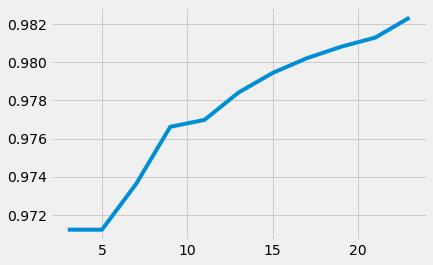

In [11]:
# Implementing our own KNN

import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import style 
from collections import Counter
import pandas as pd
import random
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) > k:
        warnings.warn('K is said to a value less than voting groups')
    
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    voted_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    return voted_result,confidence



df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace = True)
df.drop(['id'],1, inplace = True)
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)

test_size = 0.2
test_set = {2:[] , 4:[]}
train_set = {2:[] , 4:[]}

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])
        
correct = 0
total = 0
knn = [i for i in range(3,25) if i % 2 != 0]
acc_list = []
        
for nn in knn:
    for i in test_set:
        for data in test_set[i]:
            result,confidence = k_nearest_neighbors(train_set, data, k=nn)
            if result == i:
                correct += 1
            total += 1
            
    accuracy = correct/total
    print(accuracy)
    acc_list.append(accuracy)
    
print('Accuracy', correct/total)  # 0.9712230215827338  
plt.plot(knn, acc_list)
plt.show()

In [3]:
for i in range(1,10):
    if i%2 == 0:
        print("Even")
    else:
        print("odd")

odd
Even
odd
Even
odd
Even
odd
Even
odd


In [10]:

# Implementing our own KNN

import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import style 
from collections import Counter
import pandas as pd
import random
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) > k:
        warnings.warn('K is said to a value less than voting groups')
    
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    voted_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    return voted_result, confidence



df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace = True)
df.drop(['id'],1, inplace = True)
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)

test_size = 0.2
test_set = {2:[] , 4:[]}
train_set = {2:[] , 4:[]}

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])
        
correct = 0
total = 0
#knn = [i for i in range(1,50) if i % 2 != 0]
acc_list = []
        
for i in test_set:
    for data in test_set[i]:
        result,confidence = k_nearest_neighbors(train_set, data, k=nn)
        if result == i:
            correct += 1
        else:
            print("Confidence", "%.2f" % confidence)
        total += 1

    
print('Accuracy', correct/total)  # 0.9712230215827338  
#plt.plot(knn, acc_list)
#plt.show()

Confidence 0.74
Confidence 0.70
Confidence 1.00
Accuracy 0.9784172661870504
